# **Creating ANN (Artificial Neural Network) Model Using PyTorch**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# simple code to load an image
img = plt.imread('cat.jpg')

In [3]:
img.shape

(422, 500, 3)

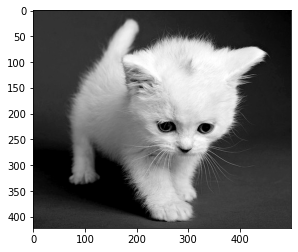

In [4]:
# to see the image
plt.imshow(img)

# Steps for creating the fully connected Artificial Neural Network

1) Load the data (how means in batches)
2) Creating FCNN
3) Creating the training loop
4) Optimise the parameters
5) Predict

# 1) Loading the data

# To Load the images we need to dollow this steps

1) Import the necassary libraries
2) Create an tranform so that it will convert the images to same shape and convert them from image matrix to tensor
3) Load the train and test data from the root folder
4) Create the Batches of data

## 1) Importing the necassary libraries

In [5]:
import torch
import numpy
import torch.nn as nn
import torch.functional as F

In [6]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

## 2) Creating an tranform

Converting diffrent image sized to same size and image matrix to tensor(i.e flattning the image)

In [7]:
transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

# RandomResizedCrop(224) means convering the diffrent image sizes to 224 size image (i.e height and weidth of image is 224)
# transforms.ToTensor() is converting to image matrix to image vector

## 3) Load the train and test data from the root folder

In [8]:
train = datasets.ImageFolder('dataset/training_set', transform = transform )
test = datasets.ImageFolder('dataset/test_set', transform = transform)


# after IamgeFolder press shift + tab you will understand (ie. we have to pass the root folder, here root folder is training_set folder)
# transfor is like trnasforming the data that we defined before

In [9]:
train

Dataset ImageFolder
    Number of datapoints: 8000
    Root location: dataset/training_set
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
           )

In [10]:
test

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: dataset/test_set
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
               ToTensor()
           )

## 4) Creating the Batches of data

In [11]:
train_dataloader = DataLoader(train, batch_size = 32, drop_last = True, shuffle = True)
test_dataloader = DataLoader(test, batch_size = 32, drop_last = True, shuffle = True)

# batch_size means take the 32 images as one batch for one one (here we not applying stocastic gardiend decent we are usinf mini bath where we divide the images by bath and we will pass (in each batch the there are 32 images))
# drop_last beacuse if some images are left that we are dropping (eg there are 8004 images then 4 images will be left out then that 4 images we are dropping)

In [12]:
# 80000 / 32 == 250 no of batches
# train_dataloader has the 250 batches and inside each batch 32 images are there

In [13]:
next(iter(train_dataloader))[0].shape

# shape is (batch_size, channel, width, height)

torch.Size([32, 3, 224, 224])

In [14]:
next(iter(train_dataloader))[1].shape

torch.Size([32])

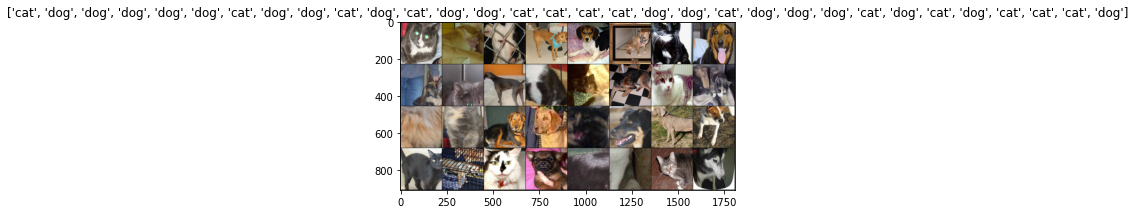

In [15]:
# here we are just plotting the 1 bath file images (to see how it looks)
import torchvision
class_names = train.classes
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     inp = std * inp + mean
#     inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputx = next(iter(train_dataloader))
inputs, classes = inputx[0], inputx[1]

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

# 2) Creating FCNN (Fully Connected Neural Network)

In [16]:
# creating our custom neural network


class Net(nn.Module):        ## all these classes that we create in custom neural network uses nn.Model as parent class
    '''This is the fundamental architecture of FCNN'''
    
    def __init__(self):
        super().__init__() ## this line brings all the intialization in parent class to __init__ module
        self.fc1 = nn.Linear(150528, 512) # here 150528 is the input (i.e 224*224*3) and 512 is the output from the first layer
        self.fc2 = nn.Linear(512, 128) # here 512 is the input to the second hidden layer and 128 is the output from the second layer
        self.fc3 = nn.Linear(128, 16) # here 128 is the input to the third hidden layer and 16 is the output from the third layer
        self.fc4 = nn.Linear(16, 1)  # here 16 is the input to the fourth hidden layer and 1 is the output from the fourth layer
        self.sig = nn.Sigmoid() # intializing the sigmoid layer
        self.dropout = nn.Dropout(0.2) # intializing the dropout layer
    
        
    def forward(self, x): # forward is a function (name is specific always we need to use forward only for forward function)
        x = torch.flatten(x, 1) # flatten the image (ie. converting from tensor to image vector)
        x = self.sig(self.fc1(x)) # passing the flatten part to the sigmoid function 
        x = self.dropout(x)
        x = self.sig(self.fc2(x)) # passing the output of 1st hidden layer to the sigmoid function 
        x = self.dropout(x)
        x = self.sig(self.fc3(x)) # passing the output of 2st hidden layer to the sigmoid function 
        x = self.dropout(x)
        x = self.sig(self.fc4(x)) # passing the output of 3st hidden layer to the sigmoid function         
        return x

In [17]:
train_dataloader

In [18]:
i = 0
for images, labels in train_dataloader:
    if i < 5:
        print(images.shape)
        print(labels)
        print('-'*40)
        i = i+1
    pass

torch.Size([32, 3, 224, 224])
tensor([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 1])
----------------------------------------
torch.Size([32, 3, 224, 224])
tensor([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1])
----------------------------------------
torch.Size([32, 3, 224, 224])
tensor([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1])
----------------------------------------
torch.Size([32, 3, 224, 224])
tensor([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0])
----------------------------------------
torch.Size([32, 3, 224, 224])
tensor([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0])
----------------------------------------


1) As you can see in 1 batch there are 32 images and each image will have size 224 * 224 * 3 (i.e height * width * channel)
2) We can also see that there are 32 labels (each image has each label) (0 is cat and 1 is dog)

In [19]:
labels = labels.unsqueeze(1)
labels

tensor([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]])

In [20]:
count = 0
for image, labels in train_dataloader:
    count +=1
print(count)

250


So there are 250 batch of images in the train_dataloader

In [21]:
model = Net()  # intializing the model

# creating the loss function

criterion = nn.BCELoss() # Loss function for binary class classificatio (for single class prection (eg : today rain or not ))
# loss = nn.MSELoss() # Loss function for regression
# loss = nn.CrossEntropyLoss() # Loss functio for multiclass classification

# creating the optimizer

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # lr is the alpha i.e learning rate
# model.parameter() here means all the parameters in our model
# if want to apply for aparticular layer then use like model.fc1.parameters()
# SGD is stocastic gradient decent

# 3) Creating the training loop

Steps for creating the training loop

1) Select the device (i.e cuda or cpu)
2) Pass the model and Loss function(criterion) to the device that you selected
3) Assign some epoch value
4) Iterate over the each epoch
5) Set the model to training state
6) Iterate over the training dataset
7) Pass the images and labels to the device that you selected
8) Zero down the gradients
9) Pass the images to the our model (i.e Running the forward propogation with the training data)
10) Caluculate the loss (i.e predicted value(logits) - original value(labels)
11) Do the backward propogation (so that weights are updated)
12) Once the weights are updated then take a step
13) Add loss caculated in each batch




14) Set the model to Evaluation state


**If you continue this steps then you can reach global minima**


***If you get any error while creating this solve that error***

In [22]:
# 1) Select the device (i.e cuda or cpu)
device = ('cuda' if torch.cuda.is_available() else 'cpu' )

# 2) Pass the model and Loss function(criterion) to the device that you selected
model.to(device)
criterion.to(device)

# 3) Assign some epoch value
epoch = 10

# Creating the training loop

training_loss_epoch = []
testing_loss_epoch = []

# Best weights
best_weight = dict()

# 4) Iterate over the each epoch
for epoch in range(epoch):
    
    print('\n')
    print(f'Starting training of epoch {epoch}')
    print('_' * 30)
    
    training_loss = 0
    testing_loss = 0
    
#   5) Set the model to training state
    model.train()
    
#   6) Iterate over the training dataset
    for images, labels in train_dataloader:
        
        images = images.type(torch.float)
        labels = labels.type(torch.float)
        
#       7) Pass the images and labels to the device that you selected
        images.to(device)
        labels.to(device)
        
        # Zero down the gradients for each batch
        optimizer.zero_grad()
        
#       9) Pass the images to the our model (i.e Running the forward propogation with the training data)       
        logits = model(images)
        labels = labels.unsqueeze(1)
        
#       10) Caluculate the loss (i.e predicted value(logits) - original value(labels)
        loss = criterion(logits, labels)
        
#       11) Do the backward propogation (so that weights are updated)
        loss.backward()
        
#       12) Once the weights are updated then take a step
        optimizer.step()
        
#       13) Add loss caculated in each batch
        training_loss += loss
    
    
    
#   14) Set the model to Evaluation state
    model.eval() 
    
    total_corrects = []
    size = len(test_dataloader.dataset)
    
    with torch.no_grad():
        
        
        num_batches = size // test_dataloader.batch_size
        total_correct = 0
        
        for images, labels in test_dataloader:

            images = images.type(torch.float)
            labels = labels.type(torch.float)

            # Taking images and labels of test data to device
            images.to(device)
            labels.to(device)
            

            # Predicting the test image
            logits = model(images)
            labels = labels.unsqueeze(1)


            # Predicting the loss for test dataset
            test_loss = criterion(logits, labels)
            
            # Calculating the total accurate predictions each batch
            
            for i in range(test_dataloader.batch_size):
                if logits[i].item() >= 0.5 and labels[i].item() == 1:
                    total_correct += 1
                if logits[i].item() < 0.5 and labels[i].item() == 0:
                    total_correct += 1

            testing_loss += test_loss
        
        total_corrects.append(total_correct)

    training_loss_epoch.append(training_loss)
    testing_loss_epoch.append(testing_loss)
    
    
    print(f'Training loss is : {training_loss}')
    print(f'Testing loss is : {testing_loss}')
    print(f'Validation Accuracy : {total_corrects[-1] / size}')
    
    
    # if the loss of the test dataset is decreasing, we will save the model weights
    if epoch > 1:
        if testing_loss < min(testing_loss_epoch):
            best_weight = model.state_dict()

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0




Starting training of epoch 0
______________________________
Training loss is : 173.99574279785156
Testing loss is : 42.982139587402344
Validation Accuracy : 0.496


Starting training of epoch 1
______________________________
Training loss is : 173.8754119873047
Testing loss is : 42.97207260131836
Validation Accuracy : 0.503


Starting training of epoch 2
______________________________
Training loss is : 174.3525848388672
Testing loss is : 42.97181701660156
Validation Accuracy : 0.4975


Starting training of epoch 3
______________________________
Training loss is : 174.07583618164062
Testing loss is : 42.974090576171875
Validation Accuracy : 0.4965


Starting training of epoch 4
______________________________
Training loss is : 173.89132690429688
Testing loss is : 42.97256851196289
Validation Accuracy : 0.496


Starting training of epoch 5
______________________________
Training loss is : 173.5787353515625
Testing loss is : 42.96851348876953
Validation Accuracy : 0.497


Starting trai

In [23]:
training_loss_epoch

[tensor(173.9957, grad_fn=<AddBackward0>),
 tensor(173.8754, grad_fn=<AddBackward0>),
 tensor(174.3526, grad_fn=<AddBackward0>),
 tensor(174.0758, grad_fn=<AddBackward0>),
 tensor(173.8913, grad_fn=<AddBackward0>),
 tensor(173.5787, grad_fn=<AddBackward0>),
 tensor(173.7382, grad_fn=<AddBackward0>),
 tensor(173.3337, grad_fn=<AddBackward0>),
 tensor(173.8129, grad_fn=<AddBackward0>),
 tensor(173.4765, grad_fn=<AddBackward0>)]